### 1) Import the necessary libraries

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

### 2) Make a function to load the images and convert it to array

In [2]:
def load_data(folder):
    images = []
    labels = []
    for label, god in enumerate(gods):
        god_folder = os.path.join(folder, god)
        for filename in os.listdir(god_folder):
            img_path = os.path.join(god_folder, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((128, 128))  # Resize for consistency
            img_array = np.array(img).flatten()
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

### 3) Panggil function sebelumnya. Make an array that includes all of the class in the data. Call the previous Function

In [3]:
gods = ['aphrodite', 'apollo', 'athena', 'hera', 'hermes', 'hestia', 'poseidon', 'zeus']
data_folder = 'C:\\Users\\Rafi Kyandra\\Desktop\\VSC\\Semester 3\\PKA\\PKA SVM\\data' # Your path
X, y = load_data(data_folder)

### 4) Print every data in the form of an array that has been flattened.

In [4]:
for god_label, god_name in enumerate(gods):
    print(f"Images for the class '{god_name}':")
    god_indices = np.where(y == god_label)[0]

    for i, image_index in enumerate(god_indices[:min(200, len(god_indices))]):
        print(f"\nImage {i + 1} as array:\n", X[image_index])

Images for the class 'aphrodite':

Image 1 as array:
 [64 45 44 ... 68 66 68]

Image 2 as array:
 [64 64 64 ... 28 28 27]

Image 3 as array:
 [79 73 70 ... 55 65 64]

Image 4 as array:
 [0 0 0 ... 0 0 0]

Image 5 as array:
 [143 145 140 ...  42  44  40]

Image 6 as array:
 [ 55  56  56 ... 201 202 202]

Image 7 as array:
 [217 217 218 ... 110 109 110]

Image 8 as array:
 [90 90 90 ... 80 80 80]

Image 9 as array:
 [0 0 0 ... 0 0 0]

Image 10 as array:
 [255 255 255 ... 255 255 255]

Image 11 as array:
 [47 32 36 ... 65 54 75]

Image 12 as array:
 [138 138 137 ... 104 103 102]

Image 13 as array:
 [148 143 145 ... 231 226 223]

Image 14 as array:
 [85 85 84 ... 98 99 98]

Image 15 as array:
 [196 197 197 ... 105 114 127]

Image 16 as array:
 [88 88 89 ... 80 79 79]

Image 17 as array:
 [ 55  56  56 ... 201 202 202]

Image 18 as array:
 [255 255 255 ... 255 255 255]

Image 19 as array:
 [193 193 192 ... 197 194 191]

Image 20 as array:
 [255 255 255 ... 255 255 255]

Image 21 as array:
 

### 5) Make a split for the dataset, training and test set. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=73)

### 6) Standardize the Data

In [6]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Make an SVM model and do validation

In [7]:
svm_model = SVC()
param_grid = {'C': [1,10,100], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': [0.01, 0.001, 0.0001]}
grid = GridSearchCV(svm_model, param_grid, refit=True, verbose=5, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=73))
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.389 total time=  17.2s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.385 total time=  13.9s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.369 total time=  14.4s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.361 total time=  13.5s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.412 total time=  14.1s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.354 total time=  20.7s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.369 total time=  20.6s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.322 total time=  21.4s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.326 total time=  18.1s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.390 total time=  14.4s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.360 total time=  10.5s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly

[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.385 total time=   9.5s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.369 total time=   9.9s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.355 total time=   9.8s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.412 total time=   9.6s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.439 total time=  12.2s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.436 total time=  12.7s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.433 total time=  12.4s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.431 total time=  14.5s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.466 total time=  16.4s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.436 total time=  12.1s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.401 total time=  11.1s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.385 total time=  11.3s
[CV 4/5] END ...C=10, gamma=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=73, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=5)

### 8) Extract the result to an excel

In [8]:
verbose_results = pd.DataFrame(grid.cv_results_)
verbose_results.to_excel('hasil_gridsearchcv.xlsx', index=False)

### 9)	Print the best parameter

In [9]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


### 10) Print the accuracy

In [10]:
y_pred = grid.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625


### 11) Make the confusion matrix

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

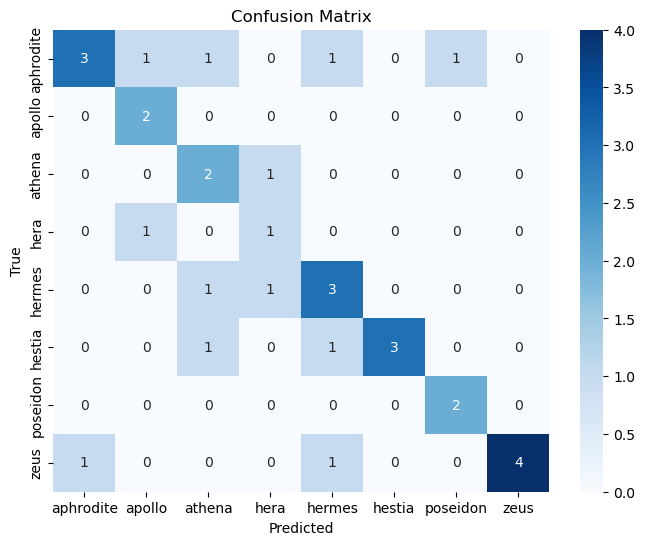

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=gods, yticklabels=gods)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 12) Print classification report

In [13]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.50      1.00      0.67         2
           2       0.40      0.67      0.50         3
           3       0.33      0.50      0.40         2
           4       0.50      0.60      0.55         5
           5       1.00      0.60      0.75         5
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         6

    accuracy                           0.62        32
   macro avg       0.64      0.68      0.63        32
weighted avg       0.72      0.62      0.64        32



### 13) Make a prediction with an image in a folder

In [14]:
def predict_from_image(image_path, scaler, grid):
    start_time = time.time()  
    img = Image.open(image_path).convert('L')
    img = img.resize((128, 128))
    img_array = np.array(img).flatten()
    scaled_img = scaler.transform([img_array])
    prediction = grid.predict(scaled_img)
    end_time = time.time()  
    elapsed_time = end_time - start_time  
    return prediction[0], elapsed_time


image_path_to_predict = 'C:\\Users\\Rafi Kyandra\\Desktop\\VSC\\Semester 3\\PKA\\PKA SVM\\data\\aphrodite\\000000029.jpg' # Your path
prediction_result, time_taken = predict_from_image(image_path_to_predict, scaler, grid)

print(f"Prediction for image '{image_path_to_predict}': {gods[prediction_result]}")
print(f"Time taken for prediction: {time_taken:.4f} seconds")


Prediction for image 'C:\Users\Rafi Kyandra\Desktop\VSC\Semester 3\PKA\PKA SVM\data\aphrodite\000000029.jpg': aphrodite
Time taken for prediction: 0.0236 seconds
